# ***Data Processing***

## Import Libs

In [1]:
import pandas as pd
import unicodedata
import re
import gc
from tqdm import tqdm
import matplotlib.pyplot as plt

## Load raw data

In [16]:
train_df = pd.read_csv('/kaggle/input/text-summarization/vnds_train.csv')
valid_df = pd.read_csv('/kaggle/input/text-summarization/vnds_validation.csv')
test_df = pd.read_csv('/kaggle/input/text-summarization/vnds_test.csv')

In [4]:
print(f"Train shape: {train_df.shape}")
train_df.head()

Train shape: (303686, 4)


,guid,title,abstract,article
0,1,Khởi_tố kẻ_trộm hơn 1 tạ thóc và hơn 8 triệu đ...,"Với bản_tính ham chơi , lười làm , có nhiều ti...","Ngày 27/3 , Cơ_quan Cảnh_sát điều_tra Công_an ..."
1,2,Chặn_đứng 2 nhóm giang_hồ mang hung_khí hỗn_ch...,"Mâu_thuẫn từ trước đó , 2 nhóm thanh_niên với ...","VTC News đưa tin , khoảng 13h ngày 31/7 , nhận..."
2,3,"Tạm giữ hai đối_tượng tháo ốc , sắt trên đường...","Để có tiền mua ma_tuý , tiêu_xài cá_nhân , Nhậ...","Ngày 25/7 , đại_diện Công_an TP. Biên_Hoà ( tỉ..."
3,4,Tạm giam 4 tháng nữ đồng_nghiệp đâm chết nam t...,"Trong lúc nói_chuyện , Hậu đã tức_giận cầm con...","Sáng 21/2 , thông_tin từ cơ_quan CSĐT Công_an ..."
4,5,"Xế hộp tiền tỷ bỗng_dưng "" bốc_hơi "" tại chung...","Xuống nhà_xe chung_cư Hà_Đô lấy xe , một người...","Theo báo Sài_Gòn Giải_Phóng , ngày 17/3 , Công..."


In [5]:
print(f"Valid shape: {valid_df.shape}")
valid_df.head()

Valid shape: (67010, 4)


,guid,title,abstract,article
0,1,"Khởi_tố , tạm giam hai nhân_viên công_ty Địa_ố...","Viện_kiểm_sát nhân_dân T X.Phú Mỹ , tỉnh Bà_Rị...","Ngày 22/6 , cơ_quan CSĐT Công_an T X.Phú Mỹ đã..."
1,2,Án chung_thân cho đối_tượng giết vợ vì ghen_tuông,"Ngày 19/9 , TAND tỉnh Đắk_Nông mở phiên_toà sơ...","Theo cáo_trạng , năm 2013 , Tiến và chị Phạm_T..."
2,3,"Phát thông_báo tìm nữ_sinh Nghệ_An xinh_đẹp "" ...","Ngày 26/6 , Công_an huyện Quỳnh_Lưu ( Nghệ_An ...","VOV đưa tin , khoảng 9h sáng ngày 25/6 , em Lê..."
3,4,"Bắt đối_tượng nghi "" ngáo đá "" truy_sát 11 ngư...",Lực_lượng công_an ở tỉnh Bạc_Liêu đã khống_chế...,"Vào_khoảng 15h ngày 24/7 , Thạch_Sà_Kh . ( SN ..."
4,5,Chủ quán massage bị tuyên 20 năm tù vì đấm khá...,"Nguyễn_Văn_Tiến ( 33 tuổi , quê Ninh_Bình ) nh...","Báo Công_Lý đưa tin , ngày 24/12 , TAND TP. Hà..."


In [6]:
print(f"Test shape: {test_df.shape}")
test_df.head()

Test shape: (67640, 4)


,guid,title,abstract,article
0,1,Bản_án cho đối_tượng giả_danh công_an để lừa_đảo,"Ngày 25/2 , TAND TP. Đà_Nẵng tuyên_phạt Hồ_Xuâ...","Theo lời khai của Huy tại phiên_toà , để có ti..."
1,2,Nam thanh_niên thủ_dâm trên xe_buýt từng bị xử...,Phát_hiện nam thanh_niên đang thủ_dâm trên xe_...,"Tối 27/6 báo Người Lao_Động đưa tin , một lãnh..."
2,3,"Không được công_nhận , thuốc "" sinh con theo ý...",""" Baby_Support "" và "" Hello baby "" là hai cái ...",Quảng_cáo như thần_dược Trên diễn_đàn của các ...
3,4,VEC từ_chối phục_vụ vĩnh_viễn 2 ô_tô gây_rối t...,Liên_quan đến vụ gây_rối tại trạm thu phí trên...,"Như báo Người Đưa_Tin đã phản_ánh trước đó , T..."
4,5,"VKSND tỉnh Sóc_Trăng xin_lỗi oan sai "" nữ_hoàn...",Bà Huỳnh_Ngọc_Bích được mọi người biết đến là ...,"Sáng 28/5 , VKSND tỉnh Sóc_Trăng tổ_chức buổi ..."


In [7]:
print(f"Train: \n{train_df.isna().sum()}")
print("-" * 20)
print(f"Valid: \n{valid_df.isna().sum()}")
print("-" * 20)
print(f"Test: \n{test_df.isna().sum()}")

Train: 
guid        0
title       0
abstract    0
article     0
dtype: int64
--------------------
Valid: 
guid        0
title       0
abstract    0
article     0
dtype: int64
--------------------
Test: 
guid        0
title       3
abstract    0
article     0
dtype: int64


In [18]:
def fix(df):
    df = df[['abstract', 'article']].rename(columns={
        'abstract': 'summary',
        'article': 'content'
    })
    return df
train_df = fix(train_df)
valid_df = fix(valid_df)
test_df = fix(test_df)

In [9]:
train_df.head()

,summary,content
0,"Với bản_tính ham chơi , lười làm , có nhiều ti...","Ngày 27/3 , Cơ_quan Cảnh_sát điều_tra Công_an ..."
1,"Mâu_thuẫn từ trước đó , 2 nhóm thanh_niên với ...","VTC News đưa tin , khoảng 13h ngày 31/7 , nhận..."
2,"Để có tiền mua ma_tuý , tiêu_xài cá_nhân , Nhậ...","Ngày 25/7 , đại_diện Công_an TP. Biên_Hoà ( tỉ..."
3,"Trong lúc nói_chuyện , Hậu đã tức_giận cầm con...","Sáng 21/2 , thông_tin từ cơ_quan CSĐT Công_an ..."
4,"Xuống nhà_xe chung_cư Hà_Đô lấy xe , một người...","Theo báo Sài_Gòn Giải_Phóng , ngày 17/3 , Công..."


## Clean Text

In [14]:
def clean_text(text):
    text = unicodedata.normalize('NFC', text)
    text = text.lower()
    text = text.replace('“', '"').replace('”', '"')
    text = text.replace('‘', "'").replace('’', "'")
    text = text.replace('`', "'")
    text = text.replace('…', '.')
    text = re.sub(r'([.,?!\'"])\1{1,}', r'\1', text)
    text = re.sub(r'[‐‑‒–—−]', '-', text)
    text = re.sub(r'(\d{1,2})h(\d{1,2})p\b', r'\1h\2', text)
    text = re.sub(r'(\d{1,2})h(\d{1,2})\'\b', r'\1h\2', text)
    text = re.sub(r'(\d{1,2}):(\d{1,2})\b', r'\1h\2', text)
    text = text.replace('-', ' - ')
    UNITS = [
        "m", "km", "cm", "mm", "μm",
        "g", "kg", "mg", "lb",
        "s", "ms", "μs", "ns",
        "hz", "khz", "mhz", "ghz",
        "b", "kb", "mb", "gb", "tb",
        "v", "w", "kw", "mah",
        "°c", "°f", "l", "ml",
        "nm", "lux", "rpm", "km/h", "m/s", "nits", "%"
    ]
    for unit in UNITS:
        pattern = rf"(\d+(?:[\.,]\d+)?){unit}"
        repl = rf"\1 {unit}"
        text = re.sub(pattern, repl, text)
    text = re.sub(r"\s+", ' ', text)
    return text.strip()

test_texts = [
    "  ĐÂY LÀ     MỘT    VÍ DỤ…!!! “Hello” – bạn ổn chứ???  ",
    "Tốc độ là 60km/h và độ dài là 20m.",
    "Đây là một loại – dash đặc biệt ‒ hay —",
    "Nhiệt độ là 25°C, ánh sáng 300nits, tần số 20kHz và độ ẩm 90%.",
    "Thật là sốc......!!!!",
    "Khối lượng 5kg, dung tích 1.5l, công suất 500w.",
    "Tôi chạy được 10km/h trong 1h.",
    "Áp suất tiêu chuẩn là 1atm và nhiệt độ là 20 độ C.",
    "Thời gian 3h30p, tốc độ quay 60rpm."
]

for t in test_texts:
    print(f"Origin: {t}")
    print(f"Clean: {clean_text(t)}")
    print("-" * 20)


Origin:   ĐÂY LÀ     MỘT    VÍ DỤ…!!! “Hello” – bạn ổn chứ???  
Clean: đây là một ví dụ.! "hello" - bạn ổn chứ?
--------------------
Origin: Tốc độ là 60km/h và độ dài là 20m.
Clean: tốc độ là 60 km/h và độ dài là 20 m.
--------------------
Origin: Đây là một loại – dash đặc biệt ‒ hay —
Clean: đây là một loại - dash đặc biệt - hay -
--------------------
Origin: Nhiệt độ là 25°C, ánh sáng 300nits, tần số 20kHz và độ ẩm 90%.
Clean: nhiệt độ là 25 °c, ánh sáng 300 nits, tần số 20 khz và độ ẩm 90 %.
--------------------
Origin: Thật là sốc......!!!!
Clean: thật là sốc.!
--------------------
Origin: Khối lượng 5kg, dung tích 1.5l, công suất 500w.
Clean: khối lượng 5 kg, dung tích 1.5 l, công suất 500 w.
--------------------
Origin: Tôi chạy được 10km/h trong 1h.
Clean: tôi chạy được 10 km/h trong 1h.
--------------------
Origin: Áp suất tiêu chuẩn là 1atm và nhiệt độ là 20 độ C.
Clean: áp suất tiêu chuẩn là 1atm và nhiệt độ là 20 độ c.
--------------------
Origin: Thời gian 3h30p, tốc độ q

In [19]:
tqdm.pandas()
print('Train df:')
train_df['content'] = train_df['content'].progress_apply(clean_text)
train_df['summary'] = train_df['summary'].progress_apply(clean_text)
print('-' * 50)

print('Valid df:')
valid_df['content'] = valid_df['content'].progress_apply(clean_text)
valid_df['summary'] = valid_df['summary'].progress_apply(clean_text)
print('-' * 50)

print('Test df:')
test_df['content'] = test_df['content'].progress_apply(clean_text)
test_df['summary'] = test_df['summary'].progress_apply(clean_text)

Train df:


100%|██████████| 303686/303686 [01:27<00:00, 3459.38it/s]


--------------------------------------------------
Valid df:


100%|██████████| 67010/67010 [00:19<00:00, 3445.35it/s]


--------------------------------------------------
Test df:


100%|██████████| 67640/67640 [00:19<00:00, 3445.49it/s]


In [20]:
train_df.head()

,summary,content
0,"với bản_tính ham chơi , lười làm , có nhiều ti...","ngày 27/3 , cơ_quan cảnh_sát điều_tra công_an ..."
1,"mâu_thuẫn từ trước đó , 2 nhóm thanh_niên với ...","vtc news đưa tin , khoảng 13h ngày 31/7 , nhận..."
2,"để có tiền mua ma_tuý , tiêu_xài cá_nhân , nhậ...","ngày 25/7 , đại_diện công_an tp. biên_hoà ( tỉ..."
3,"trong lúc nói_chuyện , hậu đã tức_giận cầm con...","sáng 21/2 , thông_tin từ cơ_quan csđt công_an ..."
4,"xuống nhà_xe chung_cư hà_đô lấy xe , một người...","theo báo sài_gòn giải_phóng , ngày 17/3 , công..."


## EDA

In [21]:
def doc_to_sentences(doc: str) -> list:
    parts = re.split(r'\s([.!?:])(?:\s+|$)', doc.strip())
    parts = [part for part in parts if part]
    sentences = []
    buffer = ''
    for part in parts:
        if part.strip() in '.!?"\'':
            buffer += ' ' + part.strip()
        else:
            if buffer:
                sentences.append(buffer)
            buffer = part.strip()
    if buffer:
        sentences.append(buffer.strip())
    return sentences

doc_test = 'Tổng bí thư Nguyễn Phú Trọng phát biểu lúc 12h49 ngày 1/1/2990 . " Quốc hội khai. mạc phiên họp thứ 2 ! " . '
print(doc_to_sentences(doc_test))

['Tổng bí thư Nguyễn Phú Trọng phát biểu lúc 12h49 ngày 1/1/2990 .', '" Quốc hội khai. mạc phiên họp thứ 2 ! " .']


In [25]:
def visualize(df, title):
    docs = df['content'].apply(doc_to_sentences).tolist()
    doc_lengths = [len(doc) for doc in docs]
    sent_lengths = [len(sent.split()) for doc in docs for sent in doc]
    summary_lengths = [len(summary.split()) for summary in df['summary']]
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    fig.suptitle(title)

    axes[0].hist(doc_lengths, bins=50, color='green')
    axes[0].set_title('Doc Lengths')
    axes[0].set_xlabel('Number of sentences')
    axes[0].set_ylabel('Frequency')

    axes[1].hist(sent_lengths, bins=50, color='orange')
    axes[1].set_title('Sentence Lengths')
    axes[1].set_xlabel('Number of words')
    axes[1].set_ylabel('Frequency')

    axes[2].hist(summary_lengths, bins=50, color='blue')
    axes[2].set_title('Summary Lengths')
    axes[2].set_xlabel('Number of words')
    axes[2].set_ylabel('Frequency')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

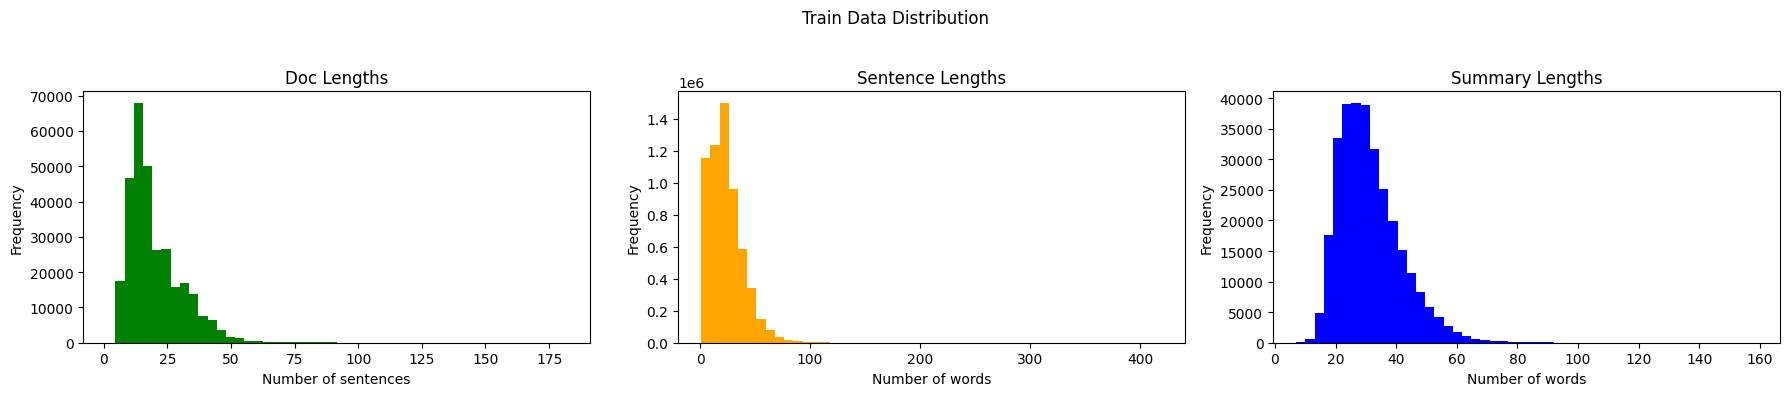

In [27]:
visualize(train_df, 'Train Data Distribution')

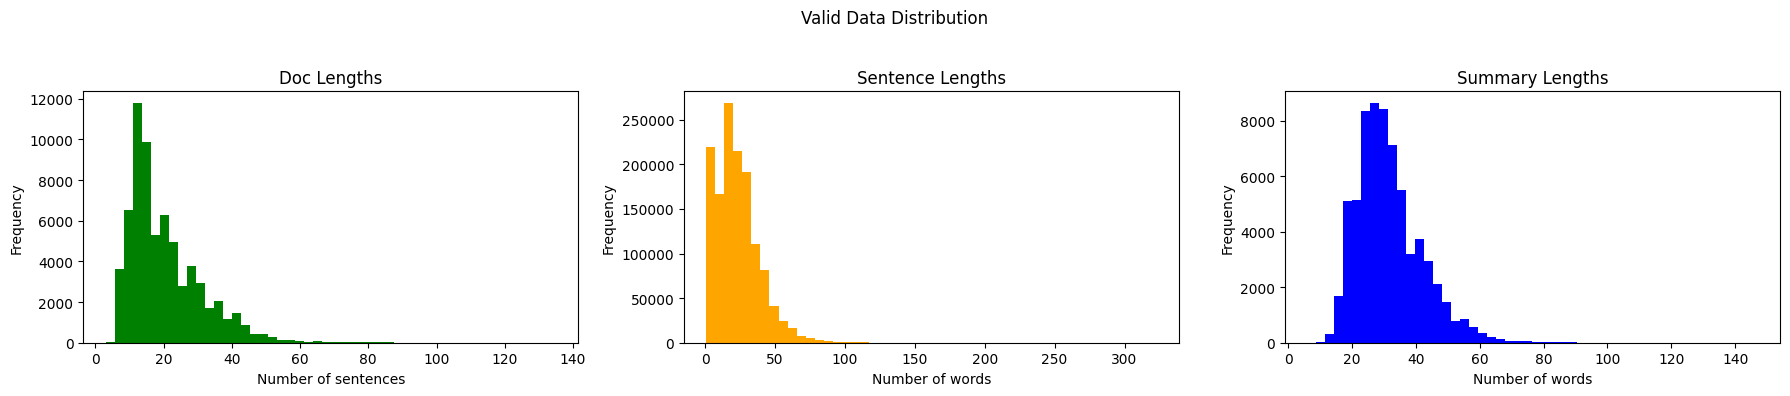

In [26]:
visualize(valid_df, 'Valid Data Distribution')

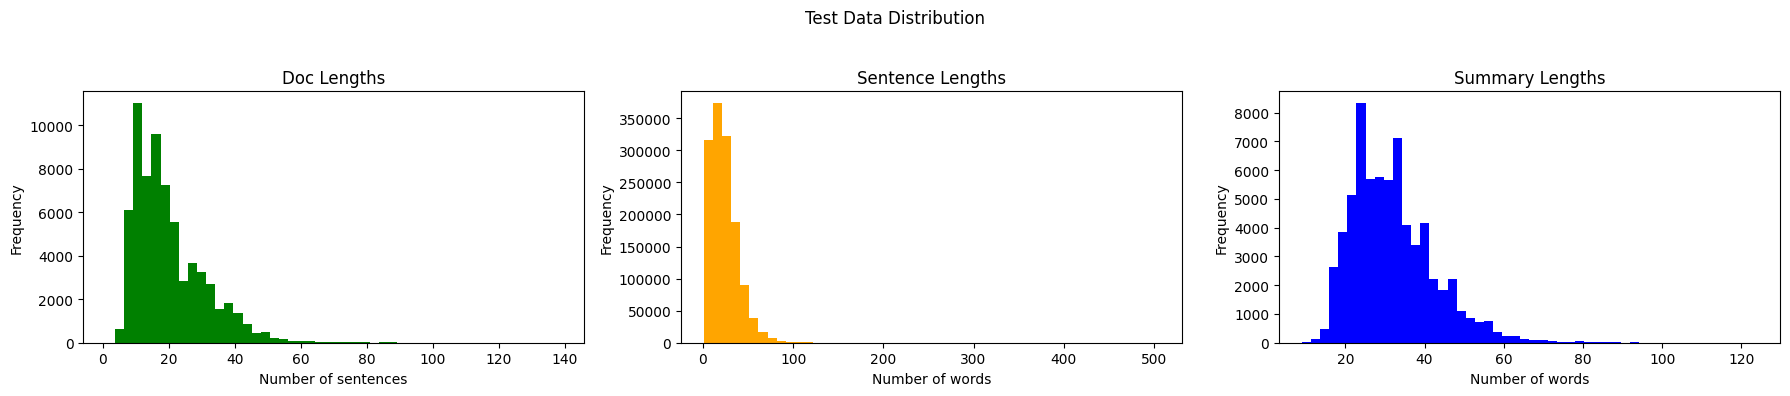

In [28]:
visualize(test_df, 'Test Data Distribution')

## Save

In [29]:
train_df.to_csv('train.csv', index=False)
valid_df.to_csv('valid.csv', index=False)
test_df.to_csv('test.csv', index=False)